In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('wdbc.data', header=None)

In [3]:
X = df.loc[:, 2:].values

In [4]:
y = df.loc[:, 1].values

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
y = le.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [14]:
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
pipe_svc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [15]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']}, {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]

In [37]:
y_pred = pipe_svc.predict(X_test)

In [38]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [39]:
print(confmat)

[[71  1]
 [ 2 40]]


In [40]:
import matplotlib.pyplot as plt

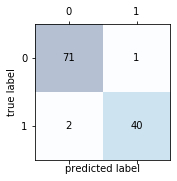

In [41]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [43]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976


In [44]:
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))

Recall: 0.952


In [45]:
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

F1: 0.964


In [46]:
from sklearn.metrics import make_scorer

In [47]:
scorer = make_scorer(f1_score, pos_label=0)

In [48]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring=scorer, cv=10)

In [49]:
gs = gs.fit(X_train, y_train)

In [50]:
print(gs.best_score_)

0.9880219137963148


In [51]:
print(gs.best_params_)

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [16]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

In [17]:
gs = gs.fit(X_train, y_train)

In [18]:
print(gs.best_score_)

0.9846153846153847


In [19]:
print(gs.best_params_)

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [20]:
clf = gs.best_estimator_

In [21]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.001,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [23]:
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.974


In [24]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2)

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)

In [29]:
import numpy as np

In [30]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.974 +/- 0.015


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}], scoring='accuracy', cv=2)

In [33]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)

In [34]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.934 +/- 0.016
